<a href="https://colab.research.google.com/github/mdeasinkhandokar/Machine_Learning/blob/main/CNN_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers
from tensorflow.keras.models import Model # Import Model from tensorflow.keras.models

import matplotlib.pyplot as plt
import numpy as np


In [6]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
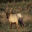

In [9]:
X_train[3]

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array,for our classification having 1D array is good enough .so we will convert this to now 1D array

In [18]:
t_train=y_train.reshape(-1,)
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
y_test=y_test.reshape(-1,)

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [29]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [39]:
#plot_sample(X_train, y_train, 0)


In [40]:
#plot_sample(X_train,y_train,1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [41]:
#Normalizing the training data
X_train=X_train/255.0
X_test=X_test/255.0



In [45]:
from tensorflow.keras import datasets, layers, models # Import models from tensorflow.keras

import matplotlib.pyplot as plt
import numpy as np

# ... (rest of your code) ...

ann = models.Sequential([ # Now 'models' is defined and can be used
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ... (rest of your code) ...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:


 ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

 ann.fit(X_train,y_train,epochs=1)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.1265 - loss: 2.3008


In [53]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print("classification Report : \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.27      0.12      0.16      1000
           5       0.37      0.09      0.14      1000
           6       0.29      0.11      0.16      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.11      0.98      0.20      1000

    accuracy                           0.13     10000
   macro avg       0.10      0.13      0.07     10000
weighted avg       0.10      0.13      0.07     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
#now let us build a convolutional neural network to train our images
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
cnn.fit(X_train,y_train,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.1006 - loss: 2.3029


In [57]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1006 - loss: 2.3026


[2.302642822265625, 0.10000000149011612]

In [58]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[0.09835014, 0.09867302, 0.10139741, 0.10081667, 0.09963898,
        0.10046837, 0.1012576 , 0.10083479, 0.0986965 , 0.09986653],
       [0.09835014, 0.09867302, 0.10139741, 0.10081667, 0.09963898,
        0.10046837, 0.1012576 , 0.10083479, 0.0986965 , 0.09986653],
       [0.09835014, 0.09867302, 0.10139741, 0.10081667, 0.09963898,
        0.10046837, 0.1012576 , 0.10083479, 0.0986965 , 0.09986653],
       [0.09835014, 0.09867302, 0.10139741, 0.10081667, 0.09963898,
        0.10046837, 0.1012576 , 0.10083479, 0.0986965 , 0.09986653],
       [0.09835014, 0.09867302, 0.10139741, 0.10081667, 0.09963898,
        0.10046837, 0.1012576 , 0.10083479, 0.0986965 , 0.09986653]],
      dtype=float32)

In [59]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[2, 2, 2, 2, 2]

In [60]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

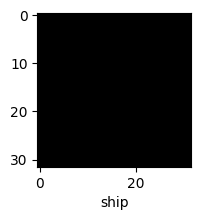

In [62]:
plot_sample(X_test,y_test,2)

In [63]:
classes[y_classes[3]]

'bird'